#INGESTÃO

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
arquivo = "/content/drive/MyDrive/BigData/creditcard.csv"
df = pd.read_csv(arquivo)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


O conjunto de dados que a gente está usando traz informações de transações com cartões de crédito feitas por clientes europeus em setembro de 2013. A ideia principal é conseguir identificar automaticamente transações suspeitas de fraude. Esse dataset é muito usado em estudos sobre o tema porque ele é real, mas ao mesmo tempo mantém a privacidade dos clientes.

As variáveis originais foram transformadas usando uma técnica chamada Análise de Componentes Principais (PCA). Essa técnica mistura várias colunas que eram parecidas entre si e cria novas variáveis chamadas componentes principais. No nosso caso, essas variáveis são as colunas V1 até V28. Elas não representam coisas específicas (tipo país, tipo de loja ou categoria do produto), mas guardam as relações matemáticas que ajudam a diferenciar o que é uma transação normal e o que pode ser fraude.

Além dessas, o dataset tem três colunas que dá pra entender de forma direta.
A coluna Time mostra o tempo (em segundos) desde a primeira transação registrada, o que ajuda a ver a sequência e possíveis padrões de tempo nas fraudes.
A coluna Amount indica o valor da transação em euros, que serve pra ver se as fraudes tendem a acontecer mais em valores baixos ou altos.
E por último, a coluna Class, que é o alvo do nosso projeto: ela vale 0 pra transações normais e 1 pra transações fraudulentas.

Um ponto importante é que esse conjunto é bem desbalanceado, tem mais de 284 mil transações normais e só 492 fraudes, o que dá menos de 0,2% do total. Esse é o principal desafio do problema e, mais pra frente, a gente vai precisar aplicar técnicas específicas pra lidar com isso na hora da modelagem e avaliação dos resultados.

Mesmo sendo só uma amostra de dois dias de transações, esse conjunto de dados representa bem um problema típico de Big Data. Em um sistema real de cartões de crédito, milhares de transações acontecem a cada segundo, no mundo todo, e precisam ser analisadas em tempo real pra evitar fraudes.

O desafio aqui não é só o volume de informações, mas também a velocidade com que os dados chegam e a complexidade das variáveis que precisam ser processadas e comparadas pra decidir se algo é suspeito ou não. Além disso, é um caso em que a quantidade de dados legítimos é enorme comparada às poucas fraudes, o que exige técnicas de processamento, armazenamento e modelagem típicas de ambientes de Big Data.

Por isso, mesmo esse dataset sendo uma versão reduzida, ele permite simular as mesmas etapas e dificuldades que aparecem em projetos reais de Big Data e aprendizado de máquina aplicados à detecção de fraudes.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.shape

(284807, 31)

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df[df['Class'] == 1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [13]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


#TRANSFORMAÇÃO

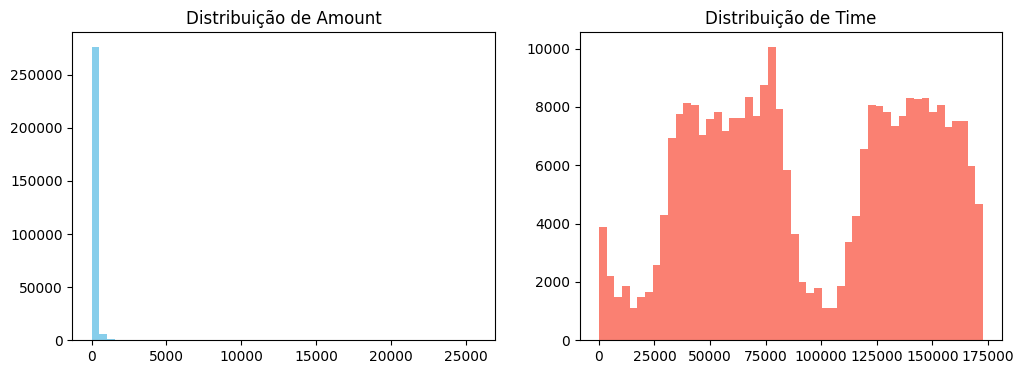

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['Amount'], bins=50, color='skyblue')
axes[0].set_title('Distribuição de Amount')

axes[1].hist(df['Time'], bins=50, color='salmon')
axes[1].set_title('Distribuição de Time')

plt.show()


Quase todos os valores ali perto to zero, alguns poucos valores puxam o gráfico para direita o que deixa tudo parecendo que está perto do zero. Se não normalizadr os modelos de machine learning vão “dar mais peso” aos valores altos de Amount, mesmo que sejam raros.
O tempo em segundos vai até perto de 175000, há duas grandes concentrações. A escala é grande (centenas de milhares), o que também precisa ser reduzido para ficar compatível com as demais colunas (V1–V28).

##NORMALIZAÇÃO

In [15]:
from sklearn.preprocessing import MinMaxScaler

df_transformado = df.copy()

scaler = MinMaxScaler()

df_transformado[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

df_transformado[['Amount', 'Time']].describe()


,Amount,Time
count,284807.000000,284807.000000
mean,0.003439,0.548717
std,0.009736,0.274828
min,0.000000,0.000000
25%,0.000218,0.313681
50%,0.000856,0.490138
75%,0.003004,0.806290
max,1.000000,1.000000


In [20]:
df_transformado.to_csv("/content/drive/MyDrive/BigData/creditcard_transformado.csv", index=False)

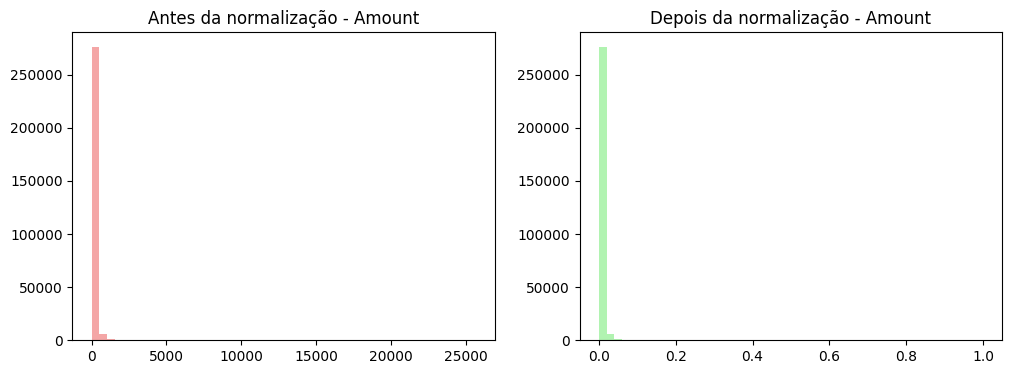

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['Amount'], bins=50, color='lightcoral', alpha=0.7)
axes[0].set_title('Antes da normalização - Amount')

axes[1].hist(df_transformado['Amount'], bins=50, color='lightgreen', alpha=0.7)
axes[1].set_title('Depois da normalização - Amount')

plt.show()


Usamos o MinMaxScaler pra trazer esses valores pra uma escala entre 0 e 1, sem mudar o formato dos dados.
Isso é importante porque, em modelos de aprendizado de máquina, diferenças grandes de escala podem fazer uma variável dominar as outras, atrapalhando o resultado.
Agora, com tudo na mesma faixa, o modelo vai conseguir aprender os padrões de forma mais equilibrada e justa.

#SIMULAÇÃO DE STREAMING

In [17]:
from pathlib import Path
import pandas as pd
import time

ARQUIVO_ORIGEM = Path("/content/drive/MyDrive/BigData/creditcard.csv")
PASTA_STREAMING = Path("/content/drive/MyDrive/BigData/dados/ingestao_streaming")
PASTA_STREAMING.mkdir(parents=True, exist_ok=True)

TAMANHO_LOTE = 5000
MAX_LOTES = 5
INTERVALO_S = 0.5

reader = pd.read_csv(ARQUIVO_ORIGEM, chunksize=TAMANHO_LOTE)
for i, chunk in enumerate(reader, start=1):
    destino = PASTA_STREAMING / f"lote_{i:04d}.csv"
    chunk.to_csv(destino, index=False)
    print(f"[STREAMING] escrevi {destino.name} ({len(chunk)} linhas)")
    time.sleep(INTERVALO_S)
    if i >= MAX_LOTES:
        print("[STREAMING] demo encerrada (MAX_LOTES atingido).")
        break


[STREAMING] escrevi lote_0001.csv (5000 linhas)
[STREAMING] escrevi lote_0002.csv (5000 linhas)
[STREAMING] escrevi lote_0003.csv (5000 linhas)
[STREAMING] escrevi lote_0004.csv (5000 linhas)
[STREAMING] escrevi lote_0005.csv (5000 linhas)
[STREAMING] demo encerrada (MAX_LOTES atingido).


In [18]:
processados = set()
total_linhas = 0

print("Aguardando arquivos chegarem...")
for _ in range(60):
    novos = sorted([p for p in PASTA_STREAMING.glob("lote_*.csv") if p.name not in processados])
    if novos:
        for arquivo in novos:
            df_lote = pd.read_csv(arquivo)
            total_linhas += len(df_lote)
            processados.add(arquivo.name)
            print(f"[CONSUMIDOR] li {arquivo.name} | linhas: {len(df_lote)} | acumulado: {total_linhas}")
    time.sleep(0.5)

print(f"[CONSUMIDOR] finalizado. Lotes lidos: {len(processados)} | Linhas totais: {total_linhas}")


Aguardando arquivos chegarem...
[CONSUMIDOR] li lote_0001.csv | linhas: 5000 | acumulado: 5000
[CONSUMIDOR] li lote_0002.csv | linhas: 5000 | acumulado: 10000
[CONSUMIDOR] li lote_0003.csv | linhas: 5000 | acumulado: 15000
[CONSUMIDOR] li lote_0004.csv | linhas: 5000 | acumulado: 20000
[CONSUMIDOR] li lote_0005.csv | linhas: 5000 | acumulado: 25000
[CONSUMIDOR] finalizado. Lotes lidos: 5 | Linhas totais: 25000


Simulação de streaming: além da ingestão em batch, incluí uma demonstração de streaming simulado: um “produtor” lê o creditcard.csv em pedaços e grava lotes sequenciais no Drive; em paralelo, um “consumidor” monitora a pasta e processa cada arquivo novo assim que aparece. Essa simulação imita o contexto real de fraudes (dados chegando continuamente)

#MODELAGEM